In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

:Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
 
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [3]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target
xmat=boston_df.drop('Price',axis=1)
y =boston_df['Price']
X_list = xmat.columns 
print(X_list)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [4]:
ulist = [1,2,3]
for index, e in enumerate(ulist):
    print(index)
    #print(e)

0
1
2


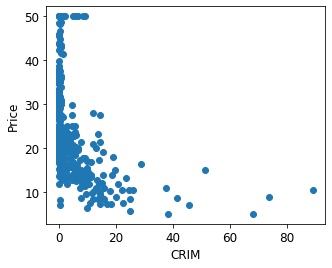

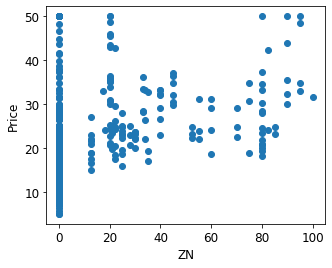

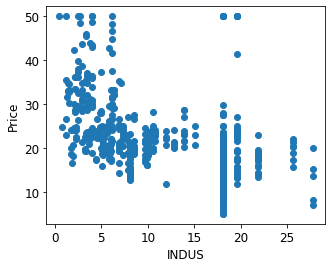

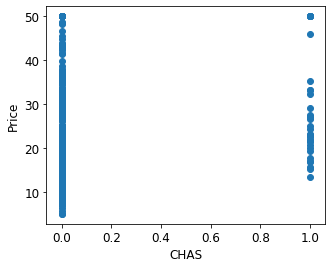

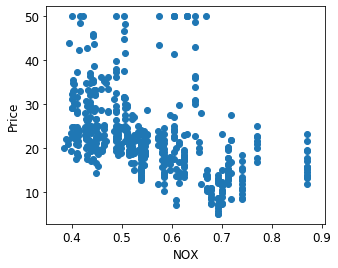

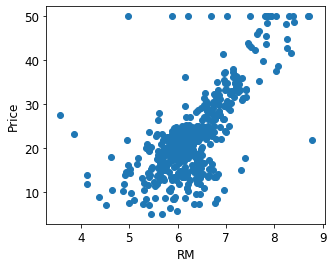

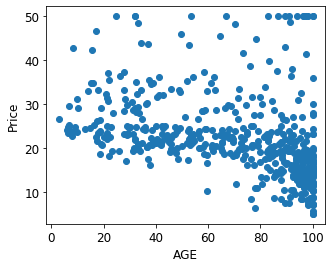

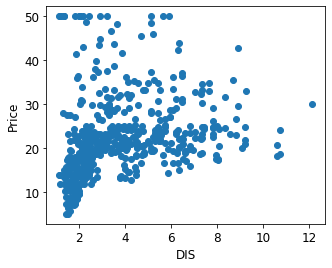

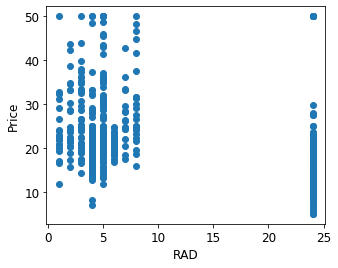

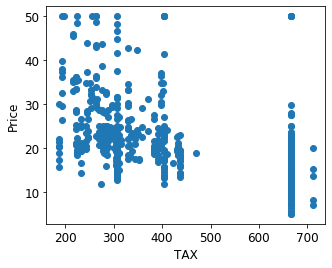

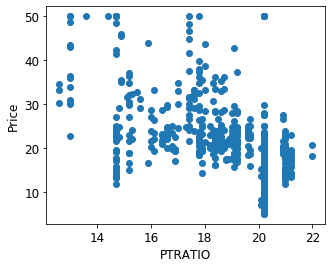

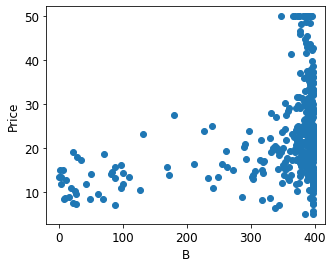

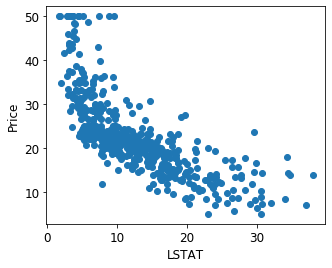

In [5]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(xmat,y,test_size=0.2,random_state=3)

In [7]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)
print(rf.decision_path(X_train))

0.908426262206469
(<404x47580 sparse matrix of type '<class 'numpy.int64'>'
	with 449010 stored elements in Compressed Sparse Row format>, array([    0,   475,   954,  1423,  1894,  2345,  2810,  3299,  3780,
        4257,  4716,  5191,  5654,  6129,  6602,  7101,  7588,  8083,
        8552,  9031,  9516,  9995, 10458, 10937, 11410, 11883, 12354,
       12839, 13320, 13801, 14260, 14735, 15220, 15701, 16172, 16659,
       17150, 17633, 18102, 18581, 19076, 19549, 20024, 20499, 20970,
       21443, 21924, 22417, 22900, 23377, 23846, 24315, 24812, 25275,
       25762, 26229, 26694, 27167, 27650, 28109, 28580, 29051, 29510,
       29979, 30480, 30941, 31426, 31883, 32360, 32841, 33308, 33795,
       34260, 34729, 35200, 35679, 36154, 36621, 37096, 37577, 38058,
       38541, 39018, 39499, 39976, 40449, 40934, 41435, 41926, 42425,
       42896, 43363, 43844, 44319, 44780, 45237, 45704, 46167, 46640,
       47115, 47580], dtype=int32))


In [8]:
l1 = ['a', 'b', 'c']
l2 = ['1', '2', '3']
print(list(zip(l1, l2)))

[('a', '1'), ('b', '2'), ('c', '3')]


In [9]:
def myfunc(x):
    return x[1]

print(myfunc([0,1]))

func = lambda x: x[1]
print(func([0, 1]))

1
1


In [10]:
importances = list(rf.feature_importances_)
pairs = list(zip(X_list, importances))
feature_importance = sorted(pairs, key=lambda x: x[1], reverse=True)
print(feature_importance)

[('LSTAT', 0.4479010215707768), ('RM', 0.3431203671286902), ('DIS', 0.07922327739467717), ('CRIM', 0.03756990174769936), ('NOX', 0.024782734413730474), ('AGE', 0.014861866005856053), ('TAX', 0.014012585870117313), ('PTRATIO', 0.013735037143876656), ('B', 0.011494567846982178), ('INDUS', 0.00726798869429374), ('RAD', 0.0037583708401917886), ('CHAS', 0.0013887254364857273), ('ZN', 0.0008835559066222588)]


In [11]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print(test_score)

0.7929270902369328


In [13]:
yhat = lasso.predict(X_train)

In [29]:
enet = ElasticNet(alpha=1.0, l1_ratio=0.7)

In [34]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [35]:
print(train_score)
print(test_score)
print(lasso.coef_!=0)
print(coeff_used)
print(lasso.get_params())
print(lasso.coef_)

0.72350564030834
0.7929270902369326
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
13
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
[-1.22093409e-01  4.84045925e-02 -6.00792200e-02  3.18091505e+00
 -1.22308414e+01  3.60789806e+00 -1.20195890e-02 -1.41327471e+00
  2.95843473e-01 -1.10077744e-02 -8.69195647e-01  1.01796984e-02
 -4.85411327e-01]


In [46]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xmat, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


MAE: -3.379
Config: {'alpha': 0.01}
